## Gold Price Movement Predictor

Lila Weizer

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

### Project Overview


#### 1. Data Collection and Cleaning

In [19]:
gold = yf.download('GC=F', start='2010-01-01', end='2024-07-01')[['Close']]
gold.rename(columns={'Close': 'Gold_Price'}, inplace=True)
gold = gold.resample('D').ffill()

C:\Users\lilaw\AppData\Local\Temp\ipykernel_14516\3280015091.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold = yf.download('GC=F', start='2010-01-01', end='2024-07-01')[['Close']]
[*********************100%***********************]  1 of 1 completed


In [23]:
gold.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in gold.columns]
gold.columns.name = None

In [28]:
gold.rename(columns={'Gold_Price_GC=F': 'Gold_Price'}, inplace=True)
gold.head()

,Gold_Price
Date,
2010-01-04,1117.699951
2010-01-05,1118.099976
2010-01-06,1135.900024
2010-01-07,1133.099976
2010-01-08,1138.199951


In [31]:
sp500 = yf.download('^GSPC', start='2010-01-01', end='2024-07-01')[['Close']]
usd = yf.download('DX-Y.NYB', start='2010-01-01', end='2024-07-01')[['Close']] 
oil = yf.download('CL=F', start='2010-01-01', end='2024-07-01')[['Close']] 
sp500.columns = ['SP500']
usd.columns = ['USD']
oil.columns = ['Crude_Oil']


gold_plus_macro = gold.join([sp500, usd, oil], how='inner')

C:\Users\lilaw\AppData\Local\Temp\ipykernel_14516\1945898450.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start='2010-01-01', end='2024-07-01')[['Close']]
[*********************100%***********************]  1 of 1 completed
C:\Users\lilaw\AppData\Local\Temp\ipykernel_14516\1945898450.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usd = yf.download('DX-Y.NYB', start='2010-01-01', end='2024-07-01')[['Close']]
[*********************100%***********************]  1 of 1 completed
C:\Users\lilaw\AppData\Local\Temp\ipykernel_14516\1945898450.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  oil = yf.download('CL=F', start='2010-01-01', end='2024-07-01')[['Close']]
[*********************100%***********************]  1 of 1 completed


In [32]:
gold_plus_macro.head()

,Gold_Price,SP500,USD,Crude_Oil
Date,,,,
2010-01-04,1117.699951,1132.989990,77.529999,81.510002
2010-01-05,1118.099976,1136.520020,77.620003,81.769997
2010-01-06,1135.900024,1137.140015,77.489998,83.180000
2010-01-07,1133.099976,1141.689941,77.910004,82.660004
2010-01-08,1138.199951,1144.979980,77.470001,82.750000


#### 2. Exploratory Data Analysis

<Axes: title={'center': 'Gold Price and Macro Indicators'}, xlabel='Date'>

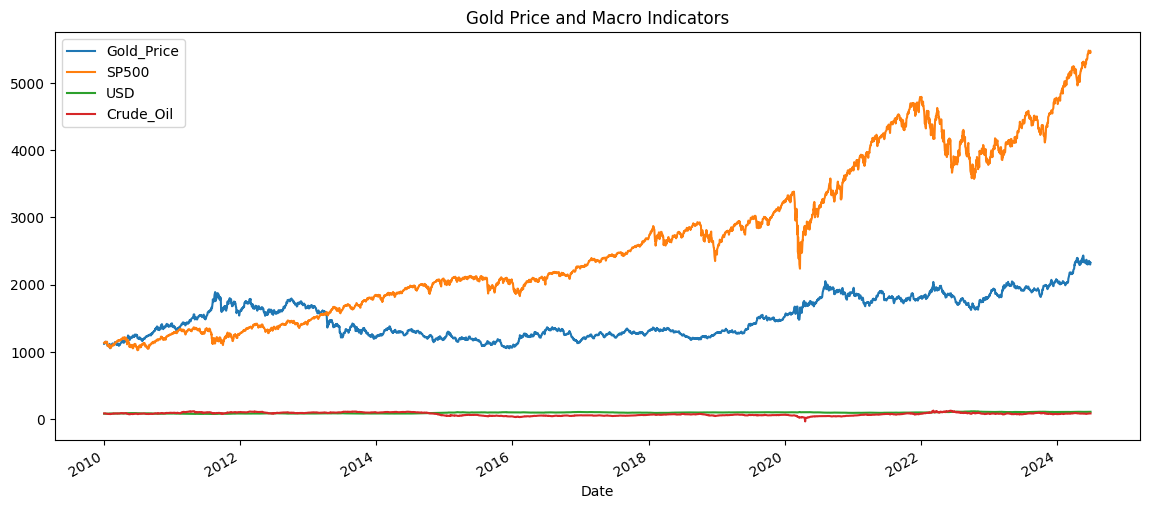

In [33]:
gold_plus_macro.plot(figsize=(14,6), title='Gold Price and Macro Indicators')

<Axes: >

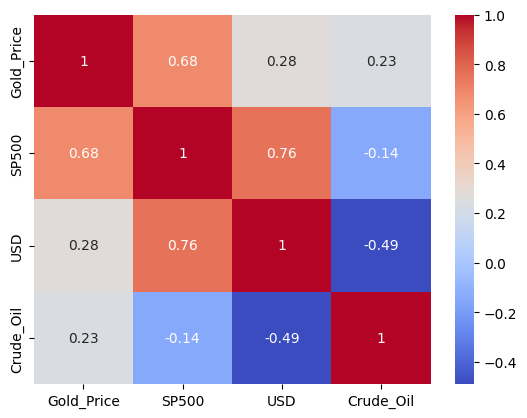

In [35]:
sns.heatmap(gold_plus_macro.corr(), annot=True, cmap='coolwarm')